In [ ]:
import tensorflow as tf
import os
import lxml.etree
import tqdm.notebook
import cv2
import numpy as np
import shutil
from google.colab import drive
drive.mount('/gdrive')
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    Add,
    Concatenate,
    Conv2D,
    Input,
    Lambda,
    LeakyReLU,
    MaxPool2D,
    UpSampling2D,
    ZeroPadding2D,
    BatchNormalization,
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import (
    binary_crossentropy,
    sparse_categorical_crossentropy
)
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard
)
import matplotlib.pyplot as plt


Mounted at /gdrive


In [ ]:
!curl --header "Host: doc-00-c0-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-IN,en-US;q=0.9,en;q=0.8" --header "Cookie: AUTH_b3b01i7259lrvrgirbn85l605a1f8baj_nonce=d4hn8c0ojncbi" --header "Connection: keep-alive" "https://doc-00-c0-docs.googleusercontent.com/docs/securesc/gqpoenedst8jhdhp6fkb99at3t9qfjim/7md85r5coo06rh4uus686nfvpdsmk841/1609079025000/13966379549055824310/13966379549055824310/1eQpOUZTyiVyTRAQHHW1FDw-9I5ko_OD1?e=download&authuser=0&nonce=d4hn8c0ojncbi&user=13966379549055824310&hash=ggchk1kuce4q6hk931vk96ome625hr8h" -L -o "train.tar.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1404M    0 1404M    0     0  82.3M      0 --:--:--  0:00:17 --:--:-- 71.1M


In [ ]:
from xml.etree import ElementTree
import tqdm.notebook
import matplotlib.pyplot as plt

In [ ]:
import shutil
shutil.unpack_archive('train.tar.gz','/content/')

In [ ]:
def evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH):

  ''' function to visualize missed predictions and ground truth '''
  groundtruth_file = open(GROUNDTRUTH_PATH)

  content = list(groundtruth_file)
  groundtruth = []
  classes = []
  for line in tqdm.notebook.tqdm(content):
    image_name = line.split()[0]
    class_name = line.split()[1]
    confidence = line.split()[2]
    coordinates = line.split()[-4:]
    coord = [int(val) for val in coordinates]
    groundtruth.append([image_name,class_name,confidence,coord])
    if class_name not in classes:
      classes.append(class_name)

  detection_file = open(DETECTIONS_PATH)
  detections = []
  content = list(detection_file)
  
  for line in tqdm.notebook.tqdm(content):
    image_name = line.split()[0]
    class_name = line.split()[1]
    confidence = line.split()[2]
    coordinates = line.split()[-4:]
    coord = [int(val) for val in coordinates]
    detections.append([image_name,class_name,confidence,coord])
    
  classes = sorted(classes)    
  prediction_missed = {}
  predicted = {}
  groundtruth_values = {}
  extra_prediction = {}
  for clas in tqdm.notebook.tqdm(classes):
    dects = []
    [dects.append(d) for d in detections if d[1] == clas]
    gt = []
  
    [gt.append(g) for g in groundtruth if g[1] == clas]

    dects = sorted(dects, key=lambda name: name[0])
    gt = sorted(gt, key=lambda name: name[0])
  
    groundtruth_values[clas] = len(gt)
    predicted[clas] = len(dects)
    prediction_missed[clas] = (len(gt) -  predicted[clas])

    if prediction_missed[clas] < 0:
      extra_prediction[clas] = predicted[clas] - groundtruth_values[clas]
      prediction_missed[clas] = 0
  
  plt.bar(range(len(predicted)), list(predicted.values()), align='center')
  plt.xticks(range(len(predicted)), list(predicted.keys()))
  plt.title('Predicted_Bounding Boxes')
  plt.show()

  plt.bar(range(len(groundtruth_values)), list(groundtruth_values.values()), align='center')
  plt.xticks(range(len(groundtruth_values)), list(groundtruth_values.keys()))
  plt.title('Groundtruth Boxes')
  plt.show()
  #extra_predicted[clas] =
  plt.bar(range(len(prediction_missed)), list(prediction_missed.values()), align='center')
  plt.xticks(range(len(prediction_missed)), list(prediction_missed.keys()))
  plt.title('Prediction Missed Boxes')
  plt.show()

  if extra_prediction:
    plt.bar(range(len(extra_prediction)), list(extra_prediction.values()), align='center')
    plt.xticks(range(len(extra_prediction)), list(extra_prediction.keys()))
    plt.title('Extra Predictions')
    plt.show()

  return 
  


 
  



<h1> Model 1 </h1>

<h2> For combined Dataset India and Japan </h2>

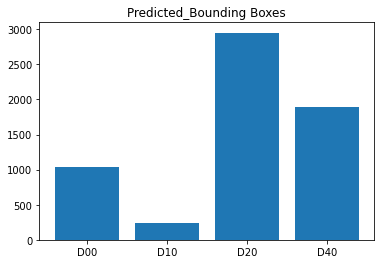

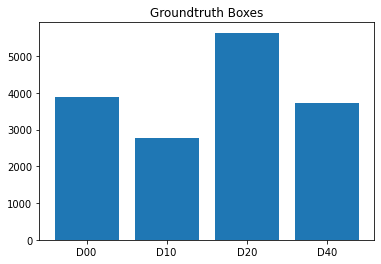

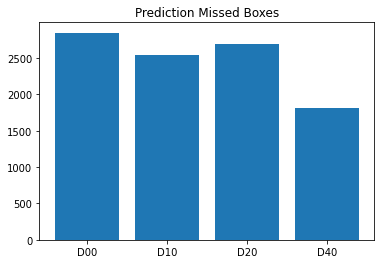

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Combined_Dataset/groundtruth_Combined_Dataset_Model1_train.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Combined_Dataset/detections_India_Model1_train_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

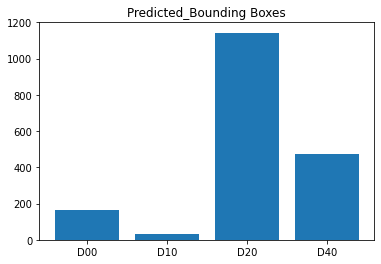

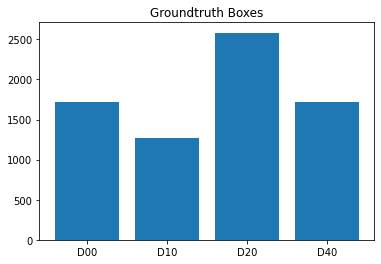

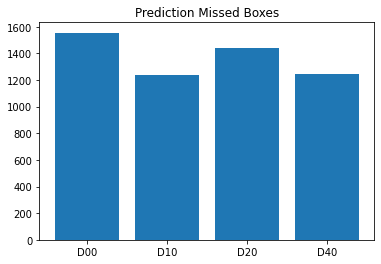

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Combined_Dataset/groundtruth_Combined_Dataset_Model1_val.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Combined_Dataset/detections_India_Model1_train_val.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For JAPAN Train Data

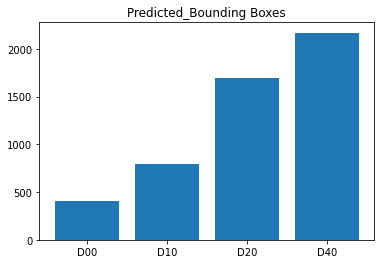

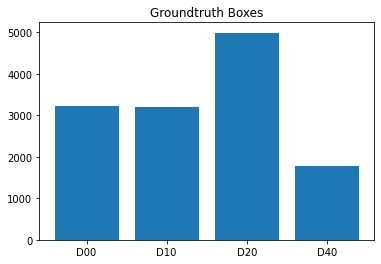

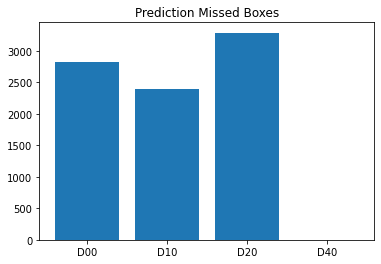

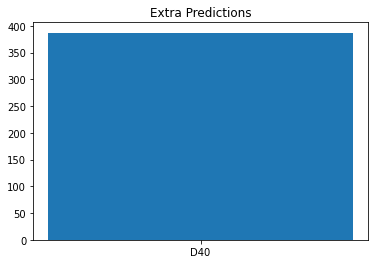

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/groundtruth_Japan_Model1.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/detections_Japan_Model1_train.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For JAPAN validation Data

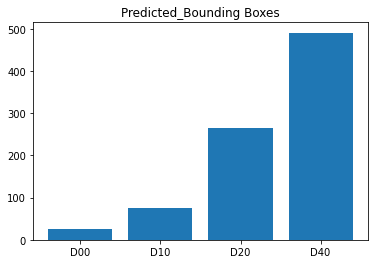

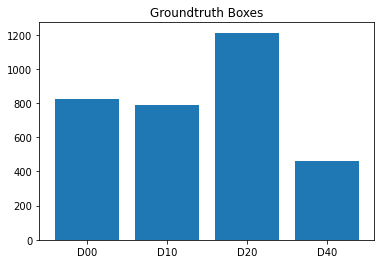

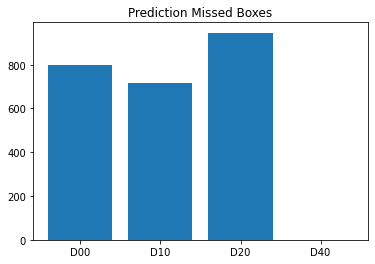

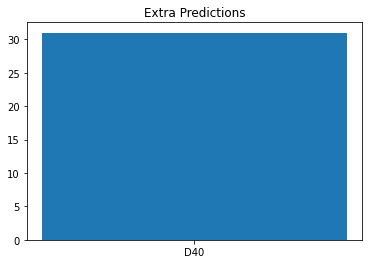

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/groundtruth_Japan_Model1_validation_data.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/detections_Japan_Model1_validation_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For India Training data </h2>

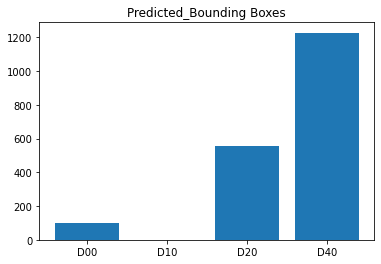

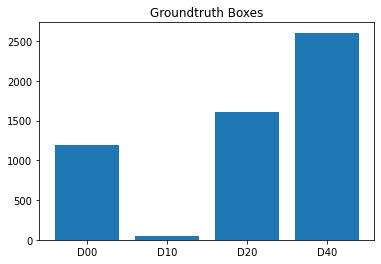

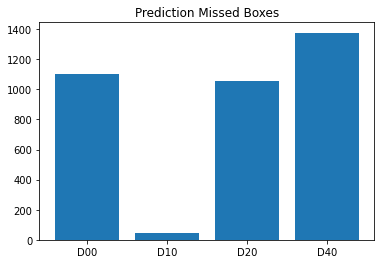

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/India/groundtruth_India_Model1_train.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/India/detections_India_Model1_train_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For India Validation data </h2>

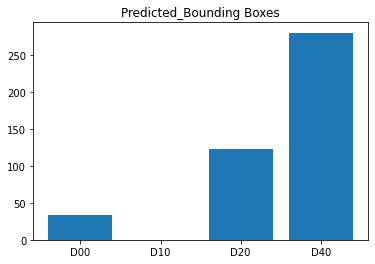

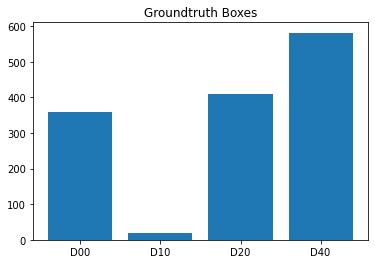

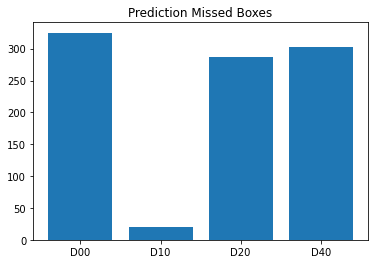

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/India/groundtruth_India_Model1_validation.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/India/detections_India_Model1_validation_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h1> Model 2 </h1>

<h2> For JAPAN Train Data

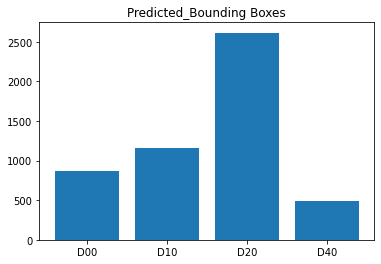

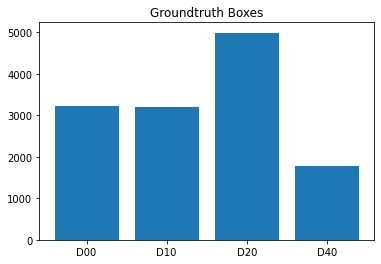

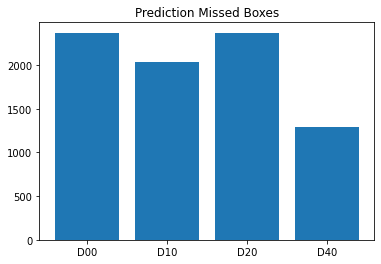

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/augmented_data/groundtruth_Japan_Model2_train.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/augmented_data/detections_Japan_Model2_train_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For JAPAN Validation Data

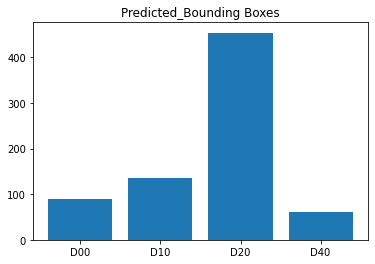

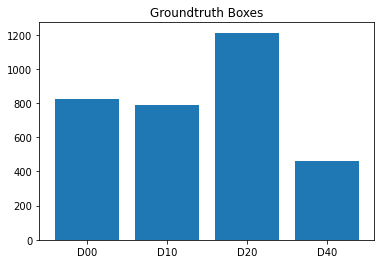

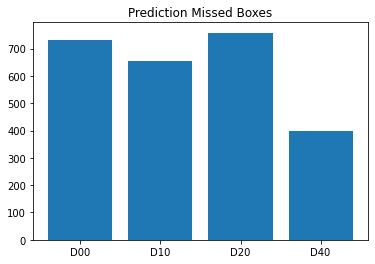

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/augmented_data/groundtruth_Japan_Model2_validation_data.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/Japan/augmented_data/detections_Japan_Model2_validation_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For Indian Train Data

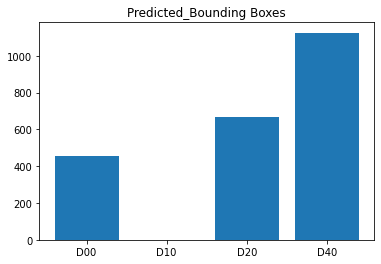

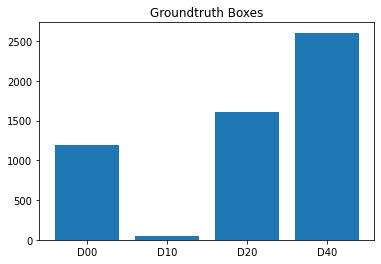

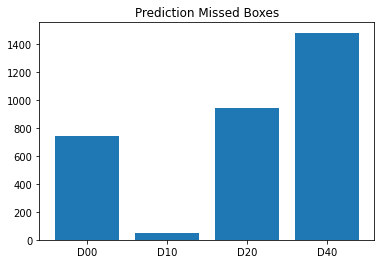

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/India/augmented_data/groundtruth_India_Model2_train.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/India/augmented_data/detections_India_Model2_train_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> For Indian Validation Data

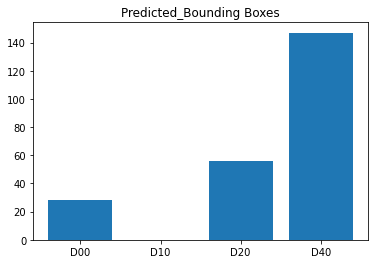

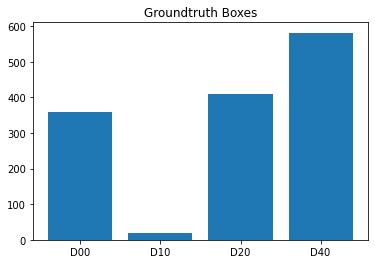

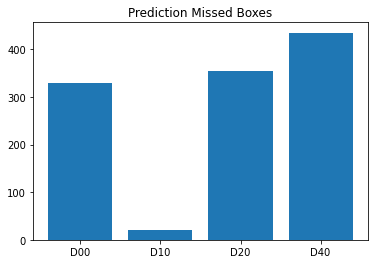

In [ ]:
GROUNDTRUTH_PATH = '/gdrive/MyDrive/Casestudy2/train/India/augmented_data/groundtruth_India_Model2_validation_data.txt'
DETECTIONS_PATH = '/gdrive/MyDrive/Casestudy2/train/India/augmented_data/detections_India_Model2_validation_data.txt'
evaluate(GROUNDTRUTH_PATH,DETECTIONS_PATH)

<h2> Observations </h2>
<ol> 
<li> From above bar plots, when the model is trained on separate dataset for 2 countries i.e Japan and India models miss predictions are very high for some types of damages but when model is trained by combining both the dataset then model improved and can able to detect the road damages better as compared to models trained on individual dataset.</li>

<li> For Model 1 Japan dataset, the model predicted extra road damages of category D40 i.e potholes as compared to Model2 and the model trained on Combined dataset. </li>

<li> Prediction Misses for D40 category is very high because as YOLOv3 doesnot give better results for small objects and potholes which are generally consider as smaller objects, so model may have missed those objects. </li>
